## APS2 - Transferência de Calor e Mecânica dos Sólidos

#### OBJETIVO GERAL
Desenvolver uma função, usando o Python, para avaliar o comportamento da temperatura de um dissipador de calor (aleta) aplicando técnicas numéricas de simulação. 

OBS:
A função deve receber:
- Dados do material: densidade do material, calor específico, condutividade térmica.
- Dados do ambiente: coeficiente de transferência por convecção, temperatura do fluido.
- Dados do dissipador: temperatura da base, raio, comprimento.
- Dados do modelo numérico: Δ𝑥, tempo total da simulação.
- A função deve retornar: Um gráfico (𝑇𝑒𝑚𝑝𝑒𝑟𝑎𝑡𝑢𝑟𝑎 × 𝑝𝑜𝑠𝑖çã𝑜) com o resultado numérico. Um gráfico (𝑇𝑒𝑚𝑝𝑒𝑟𝑎𝑡𝑢𝑟𝑎 × 𝑝𝑜𝑠𝑖çã𝑜) com o resultado analítico. Use legendas e indique as unidades usadas. 

In [75]:
from math import *
import numpy as np 
from  matplotlib import pyplot as plt

### Descrição do problema

Considere uma aleta de seção transversal circular e constante, com temperatura fixa na base e exposta ao ambiente em
todas as outras superfícies. Podemos esboçar as entradas e saídas de energia em um volume de controle definido ao
redor de uma seção como indica a Fig.1. 

<img src="./img1.png"  width=50% alt="problema"> </img>

1. Aplique os conceitos do método das diferenças finitas na equação diferencial do problema para definir uma equação de diferença algébrica associada aos nós da aleta. Considere para a segunda derivada da temperatura no espaço uma equação de diferença finita centrada e para a primeira derivada no tempo da temperatura uma equação de diferença progressiva. Apresente o desenvolvimento das equações.

#### Da equação do enunciado, temos a fórmula 
<img src="./img2.png"  width=30% alt="formula"> </img>
#### Temos
<img src="./img3.png"  width=30% alt="formula"> </img>
#### Temos
<img src="./img4.png"  width=30% alt="formula"> </img>
#### Temos
<img src="./img5.png"  width=30% alt="formula"> </img>


2. Apresente um gráfico (𝑇𝑒𝑚𝑝𝑒𝑟𝑎𝑡𝑢𝑟𝑎 × 𝑝𝑜𝑠𝑖çã𝑜) após obter o regime permanente. Use uma tolerância de 𝑡𝑜𝑙 = 1 ∙ 10ିଵ଴. Considere que a aleta, de comprimento 𝐿 = 300𝑚𝑚 , densidade de 2700 𝑘𝑔/𝑚³ , condutividade térmica de 180 𝑊/(𝑚𝐾) e calor específico 896𝐽/(𝑘𝑔𝐾), tem a temperatura especificada na extremidade de 𝑇(𝐿) = 25℃. A aleta está em contato com uma base a 𝑇௕ = 100℃ em um ambiente a 𝑇ஶ = 50℃ e ℎ = 50𝑊/𝑚ଶ𝐾. Para a condição de estabilidade do procedimento numérico use Δ𝑡 ≤ ୼௫మ ఈ∙൬೓ು౴ೣమ ೖಲ೟ೝ ାଶ൰

In [76]:
𝑡𝑜𝑙 = 1e-10 # Tolerância 
l = 300e-3 # Comprimento da aleta [m]
d = 2700 # Densidade [kg/m^3]
k = 180 # Condutividade térmica [W/mK]
c = 896 # Calor específico [J/kgK]
Tb = 100 # Temperatura da base
Ta = 50 # Temperatura Ambiente 
T_ext = 25 #Temperatura na extremidade
h = 50 # Coeficiente de transferência [W/m^2K]
delta_x = 1e-3

/tmp/ipykernel_12229/4088666266.py:14: RuntimeWarning: overflow encountered in double_scalars
  T[x+1, i] = T[x, i] + (alfa*delta_t)*((T[x, i+1] - 2*T[x, i] + T[x, i-1])/(delta_x**2) - C*(T[x, i] - Tf))
/tmp/ipykernel_12229/4088666266.py:14: RuntimeWarning: invalid value encountered in double_scalars
  T[x+1, i] = T[x, i] + (alfa*delta_t)*((T[x, i+1] - 2*T[x, i] + T[x, i-1])/(delta_x**2) - C*(T[x, i] - Tf))


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.11111112e-06  1.11111112e-06 ...  1.11111112e-06
   1.11111112e-06  0.00000000e+00]
 [ 0.00000000e+00 -3.70370376e-14  2.22222221e-06 ...  2.22222221e-06
  -3.70370376e-14  0.00000000e+00]
 ...
 [ 0.00000000e+00             nan             nan ...             nan
              nan  0.00000000e+00]
 [ 0.00000000e+00             nan             nan ...             nan
              nan  0.00000000e+00]
 [ 0.00000000e+00             nan             nan ...             nan
              nan  0.00000000e+00]]


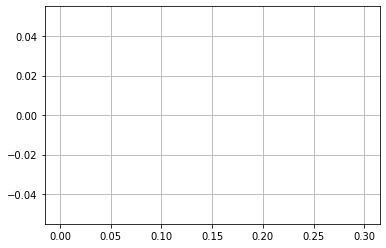

In [77]:
def temp_aleta(d, c, k, h, Tf, Tb, r, l, delta_x, t_total): 
    #retorna um gráfico
    p = 2*pi*r #perimetro
    Atr = pi*(r**2)
    C = (h*p)/(k*Atr)
    alfa = k/(d*c)
    delta_t = (delta_x**2) / alfa*(C*(delta_x**2) + 2)
    passos = int(t_total / delta_t)
    n_nos = int(l/delta_x) + 1
    T = np.zeros((passos, n_nos))
    
    for x in range(0, passos - 1):
        for i in range(1, n_nos - 1):
            T[x+1, i] = T[x, i] + (alfa*delta_t)*((T[x, i+1] - 2*T[x, i] + T[x, i-1])/(delta_x**2) - C*(T[x, i] - Tf))
        
    x = np.arange(0, l, delta_x)
    print(T)
    plt.plot(x, T[-1])
    plt.grid(True)
    plt.show()

    return

temp_aleta(d, c, k, h, 50, Tb, 50, l, delta_x, 100)

3. Para validar os resultados obtidos com o software desenvolvido, apresente um gráfico (𝑇𝑒𝑚𝑝𝑒𝑟𝑎𝑡𝑢𝑟𝑎 × 𝑝𝑜𝑠𝑖çã𝑜) para o comportamento analítico da temperatura na aleta usando as mesmas condições definidas no item anterior. 